# Lifestyle-Based Blood Pressure Prediction

**Prepared for**: UMBC Data Science Master’s Degree Capstone – Dr. Chaojie (Jay) Wang  

**Author**: Mera Mathew 

- **GitHub Repository**: *[https://github.com/MeraMathew/UMBC-DATA606-Capstone]*  
- **LinkedIn Profile**: *[https://www.linkedin.com/in/mera-mathew-026771170/]*  

## 2. Background

Hypertension (high blood pressure) is a leading risk factor for cardiovascular disease and stroke.  
This project develops a machine-learning regression model to **predict systolic and diastolic blood pressure** using demographic, dietary, physical activity, smoking, and alcohol indicators derived from the U.S. **National Health and Nutrition Examination Survey (NHANES)**.

**Why it matters**  
- Enables early detection of elevated blood pressure risk.  
- Highlights modifiable lifestyle factors—such as sodium intake, exercise, smoking, and drinking—that can guide personal and public-health interventions.  
- Demonstrates an end-to-end data science workflow with real public health data.

**Research Questions**  
1. To what extent can demographic, diet, physical activity, smoking, and alcohol variables predict blood pressure?  
2. Which factors contribute most to systolic and diastolic blood pressure?


## 3. Data

#### Data Sources
NHANES survey cycles covering **August 2021 – August 2023**  
(publicly available at [https://www.cdc.gov/nchs/nhanes/](https://www.cdc.gov/nchs/nhanes/)):

To build a single machine-learning-ready table, **combined several NHANES component datasets** by joining on the unique participant ID `SEQN`:

- **Examination**: BPX (Blood Pressure), BMX (Body Measures)
- **Demographics**: DEMO
- **Dietary**: DR1TOT (Day-1 nutrient intake)
- **Physical Activity**: PAQ
- **Smoking**: SMQ
- **Alcohol**: ALQ

This integration step ensured that each participant’s demographics, body measures, diet, activity level, smoking history, and alcohol consumption are available in **one dataset**.

#### Data Details

- **Time period covered**  
  August 2021 – August 2023 (NHANES survey cycles for those two years)

- **Observation unit**  
  Each row represents **one individual NHANES participant**, with all lifestyle, demographic, and health measurements merged into a single record.

- **Data dictionary (key columns)**  

| Column | Type | Definition / Units | Categories / Encoded Labels |
|--------|------|--------------------|------------------------------|
| `Participant_ID` | int | Unique NHANES participant ID | e.g., 130378 |
| `Systolic_BP` | float | Mean systolic blood pressure (mmHg) | – |
| `Diastolic_BP` | float | Mean diastolic blood pressure (mmHg) | – |
| `Age_Years` | int | Age of participant | e.g., 43 |
| `Gender` | category | Biological sex | 0 = Male, 1 = Female |
| `Race_Ethnicity` | category | Race/ethnicity group | 0 = Non-Hispanic White, 1 = Non-Hispanic Black, 2 = Mexican American, 3 = Other (Other Hispanic, Non-Hispanic Asian, Multiracial) |
| `BMI` | float | Body Mass Index (kg/m²) | e.g., 27.5 |
| `Weight_kg` | float | Body weight | e.g., 74.0 |
| `Height_cm` | float | Body height | e.g., 172.0 |
| `Sodium_mg` | float | Daily sodium intake | e.g., 3200 |
| `Potassium_mg` | float | Daily potassium intake | e.g., 2900 |
| `Calories_kcal` | float | Total daily calorie intake | e.g., 2100 |
| `Vigorous_Activity_Days` | int | Days/week of vigorous activity | 0–7 |
| `Moderate_Activity_Days` | int | Days/week of moderate activity | 0–7 |
| `Ever_Smoked_100_Cigs` | category | Ever smoked ≥100 cigarettes | 0 = No, 1 = Yes |
| `Current_Smoking_Status` | category | Current smoking frequency | 0 = Not at all, 1 = Some days, 2 = Every day |
| `Drinks_per_Week` | float | Estimated alcoholic drinks per week | e.g., 2.5 |
| `Had_12_Drinks_Lifetime` | category | Ever consumed ≥12 drinks in lifetime | 0 = No, 1 = Yes |

- **Target / Label variables for ML model**  
  - `Systolic_BP`  
  - `Diastolic_BP`

- **Feature / Predictor candidates**  
  - Demographics: `Age_Years`, `Gender`, `Race_Ethnicity`
  - Body measures: `BMI`, `Weight_kg`, `Height_cm`
  - Diet: `Sodium_mg`, `Potassium_mg`, `Calories_kcal`
  - Physical activity: `Vigorous_Activity_Days`, `Moderate_Activity_Days`
  - Lifestyle habits: `Ever_Smoked_100_Cigs`, `Current_Smoking_Status`, `Drinks_per_Week`

In [3]:
import pandas as pd

# Load the combined dataset (replace with your CSV file path)
df = pd.read_csv("nhanes_bp_lifestyle_clean.csv")

# Overview
print(df.shape)
df.head()
df.info()
df.describe()

(7518, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7518 entries, 0 to 7517
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant_ID          7518 non-null   float64
 1   Systolic_BP             7518 non-null   float64
 2   Diastolic_BP            7518 non-null   float64
 3   Pulse_Rate              7518 non-null   float64
 4   Age_Years               7518 non-null   float64
 5   Gender                  7518 non-null   object 
 6   Race_Ethnicity          7518 non-null   object 
 7   BMI                     7453 non-null   float64
 8   Weight_kg               7467 non-null   float64
 9   Height_cm               7475 non-null   float64
 10  Sodium_mg               5820 non-null   float64
 11  Potassium_mg            5820 non-null   float64
 12  Calories_kcal           5820 non-null   float64
 13  Ever_Smoked_100_Cigs    6114 non-null   object 
 14  Current_Smoking_Status  2436 

,Participant_ID,Systolic_BP,Diastolic_BP,Pulse_Rate,Age_Years,BMI,Weight_kg,Height_cm,Sodium_mg,Potassium_mg,Calories_kcal,Cigarettes_Per_Day,Drinks_Per_Day
count,7518.000000,7518.000000,7518.000000,7518.000000,7518.000000,7453.000000,7467.000000,7475.000000,5.820000e+03,5.820000e+03,5.820000e+03,2.040000e+02,4015.000000
mean,136338.014099,119.094418,72.210894,73.041789,44.993748,28.261425,77.661614,164.754395,3.050609e+03,2.405703e+03,1.976426e+03,1.265196e+01,5.891905
std,3453.214803,18.151729,11.463845,12.564442,22.657383,7.564814,24.382140,12.098596,1.605981e+03,1.260558e+03,9.036276e+02,1.386179e+01,55.363277
min,130378.000000,70.000000,34.000000,34.000000,8.000000,11.100000,20.000000,118.100000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000
25%,133316.250000,106.333333,64.000000,64.333333,23.000000,23.100000,61.400000,157.500000,1.992000e+03,1.574000e+03,1.385000e+03,3.000000e+00,1.000000
50%,136362.500000,116.333333,71.666667,72.166667,47.000000,27.200000,75.500000,165.100000,2.752500e+03,2.214500e+03,1.846000e+03,1.000000e+01,2.000000
75%,139316.500000,129.000000,79.333333,81.000000,65.000000,32.300000,91.600000,173.100000,3.751500e+03,2.991250e+03,2.428000e+03,2.000000e+01,3.000000
max,142310.000000,232.333333,139.000000,151.000000,80.000000,68.900000,248.200000,200.700000,2.000600e+04,1.429600e+04,1.044600e+04,9.900000e+01,999.000000


## Preprocessing

In [5]:
# Percentage of missing values per column
df.isnull().mean().sort_values(ascending=False)

Cigarettes_Per_Day        0.972865
Current_Smoking_Status    0.675978
Drinks_Per_Day            0.465948
Sodium_mg                 0.225858
Calories_kcal             0.225858
Potassium_mg              0.225858
Ever_Smoked_100_Cigs      0.186752
BMI                       0.008646
Weight_kg                 0.006784
Height_cm                 0.005720
Systolic_BP               0.000000
Race_Ethnicity            0.000000
Gender                    0.000000
Age_Years                 0.000000
Pulse_Rate                0.000000
Diastolic_BP              0.000000
Participant_ID            0.000000
dtype: float64

In [20]:
import pandas as pd

def preprocess(df):
    # Drop column with too many missing values
    if 'Cigarettes_Per_Day' in df:
        df = df.drop(columns=['Cigarettes_Per_Day'])

    # median
    for col in ['Sodium_mg', 'Potassium_mg', 'Calories_kcal']:
        if col in df:
            df[col] = df[col].fillna(df[col].median())

    # mode
    if 'Ever_Smoked_100_Cigs' in df:
        df['Ever_Smoked_100_Cigs'] = df['Ever_Smoked_100_Cigs'].fillna(df['Ever_Smoked_100_Cigs'].mode()[0])

    if 'Current_Smoking_Status' in df:
        df['Current_Smoking_Status'] = df['Current_Smoking_Status'].fillna('Unknown')

    # Fill drinks info
    if 'Drinks_Per_Day' in df:
        df['Drinks_Per_Day'] = df['Drinks_Per_Day'].fillna(0)  

    # Return cleaned df
    df2 = preprocess(df)
    return df

In [21]:
if 'BMI' in df2:
    df2 = df2.drop(columns=['BMI'])
    print("Removed BMI column to avoid multicollinearity.")

Removed BMI column to avoid multicollinearity.


In [22]:
df2.isnull().mean().sort_values(ascending=False)

Weight_kg                 0.006784
Height_cm                 0.005720
Participant_ID            0.000000
Systolic_BP               0.000000
Diastolic_BP              0.000000
Pulse_Rate                0.000000
Age_Years                 0.000000
Gender                    0.000000
Race_Ethnicity            0.000000
Sodium_mg                 0.000000
Potassium_mg              0.000000
Calories_kcal             0.000000
Ever_Smoked_100_Cigs      0.000000
Current_Smoking_Status    0.000000
Drinks_Per_Day            0.000000
dtype: float64

In [23]:
for col in ['Height_cm', 'Weight_kg']:
    if col in df2:
        df2[col] = df2[col].fillna(df2[col].median())
print("Filled missing height and weight with median values.")

Filled missing height and weight with median values.


In [24]:
df2.isnull().mean().sort_values(ascending=False)

Participant_ID            0.0
Systolic_BP               0.0
Diastolic_BP              0.0
Pulse_Rate                0.0
Age_Years                 0.0
Gender                    0.0
Race_Ethnicity            0.0
Weight_kg                 0.0
Height_cm                 0.0
Sodium_mg                 0.0
Potassium_mg              0.0
Calories_kcal             0.0
Ever_Smoked_100_Cigs      0.0
Current_Smoking_Status    0.0
Drinks_Per_Day            0.0
dtype: float64

## Exploratory Data Analysis

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#### Plot 1: Distribution of Systolic and Diastolic BP

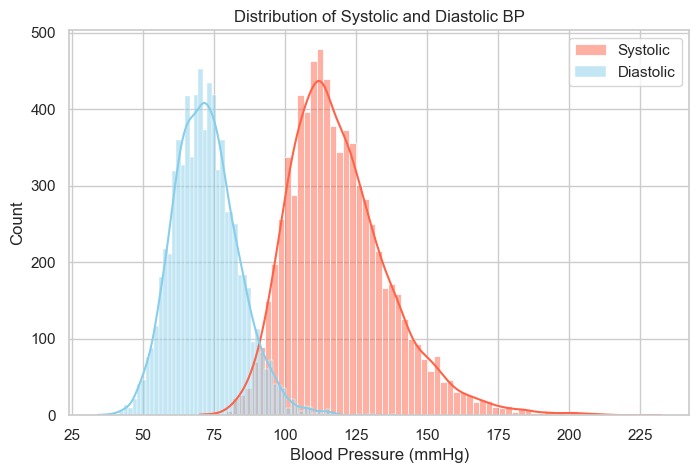

In [26]:
#Distribution of Blood Pressure
plt.figure(figsize=(8,5))
sns.histplot(df2['Systolic_BP'], kde=True, color='tomato', label='Systolic')
sns.histplot(df2['Diastolic_BP'], kde=True, color='skyblue', label='Diastolic')
plt.title("Distribution of Systolic and Diastolic BP")
plt.xlabel("Blood Pressure (mmHg)")
plt.legend()
plt.show()

#### Plot 2: Systolic BP vs Age

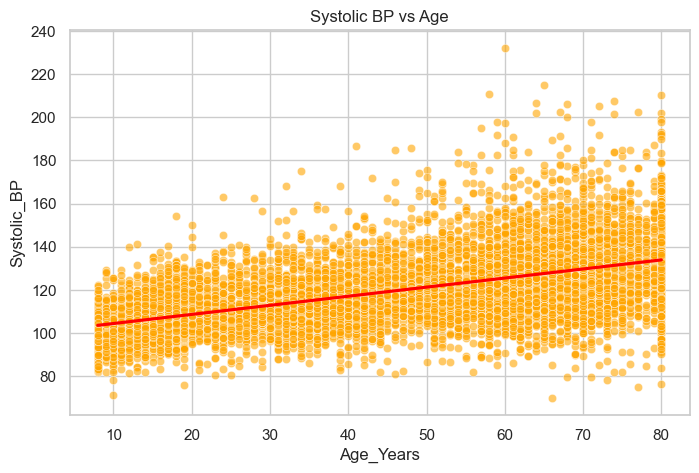

In [28]:
#Blood Pressure vs Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age_Years', y='Systolic_BP', data=df2, alpha=0.6, color='orange')
sns.regplot(x='Age_Years', y='Systolic_BP', data=df2, scatter=False, color='red')
plt.title("Systolic BP vs Age")
plt.show()

#### Plot 3: Systolic BP by Gender

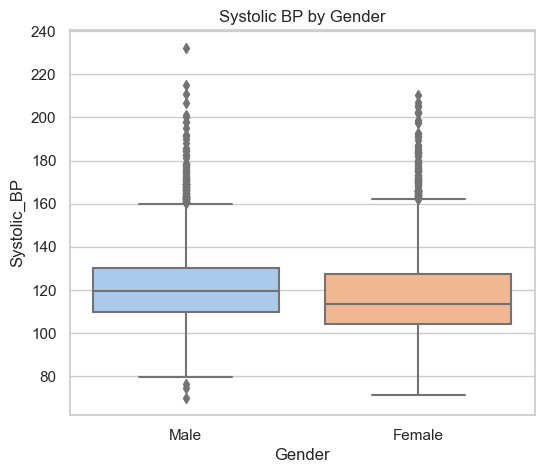

In [29]:
#BP by Gender
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Systolic_BP', data=df2, palette='pastel')
plt.title("Systolic BP by Gender")
plt.show()

#### Plot 4: Systolic BP by Race/Ethnicity

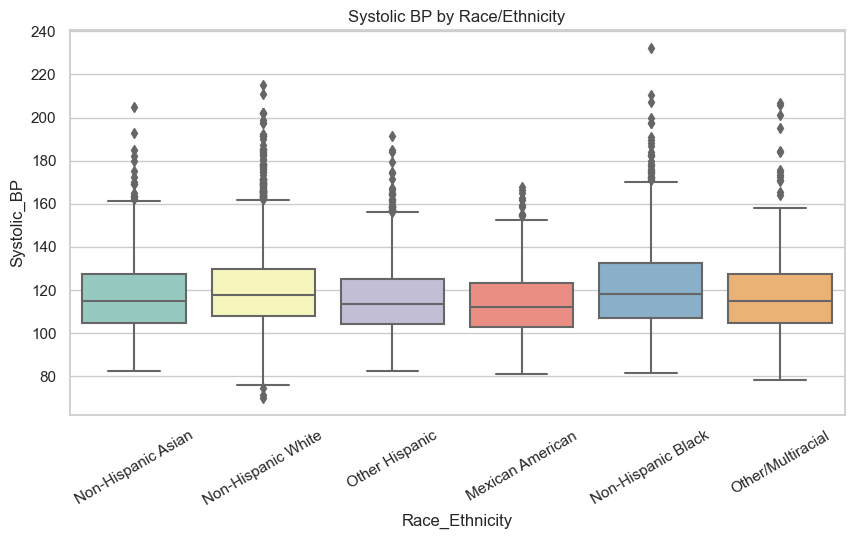

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Race_Ethnicity', y='Systolic_BP', data=df2, palette='Set3')
plt.title("Systolic BP by Race/Ethnicity")
plt.xticks(rotation=30)
plt.show()


#### Plot 5: Systolic BP by Smoking Status

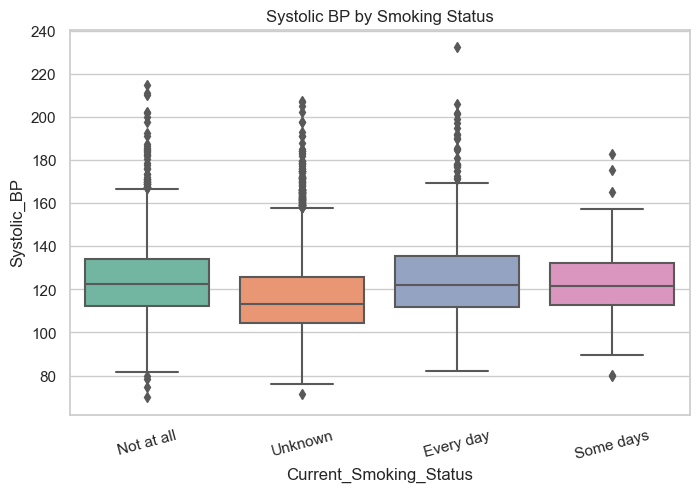

In [33]:
#Systolic BP by Smoking Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Current_Smoking_Status', y='Systolic_BP', data=df2, palette='Set2')
plt.title("Systolic BP by Smoking Status")
plt.xticks(rotation=15)
plt.show()


#### Plot 6: Systolic BP vs Alcohol Intake

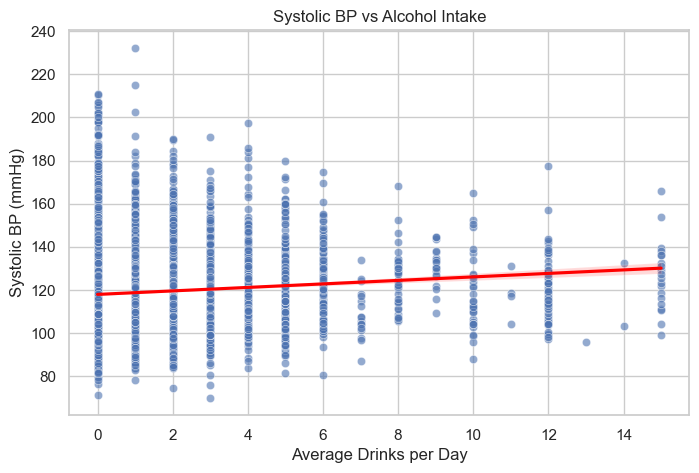

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Drinks_Per_Day', y='Systolic_BP', data=df2[df2['Drinks_Per_Day'] <= 600], alpha=0.6)
sns.regplot(x='Drinks_Per_Day', y='Systolic_BP', data=df2[df2['Drinks_Per_Day'] <= 600],
            scatter=False, color='red')
plt.title("Systolic BP vs Alcohol Intake")
plt.xlabel("Average Drinks per Day")
plt.ylabel("Systolic BP (mmHg)")
plt.show()

#### Plot 7: Age vs Systolic BP across Ethnic Groups

C:\Users\meera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


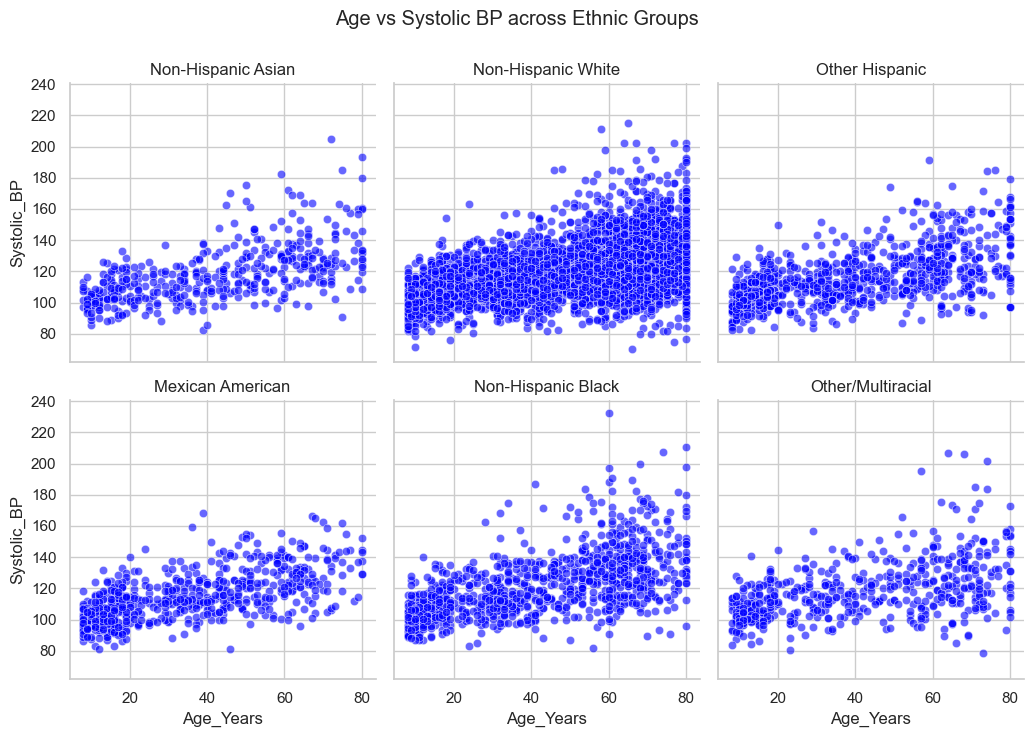

In [46]:
g = sns.FacetGrid(df2, col='Race_Ethnicity', col_wrap=3, height=.5)
g.map_dataframe(sns.scatterplot, x='Age_Years', y='Systolic_BP', color='blue', alpha=0.6)
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Age vs Systolic BP across Ethnic Groups", y=1.05)
plt.show()


#### Plot 8: Systolic BP vs Weight (Colored by Height)

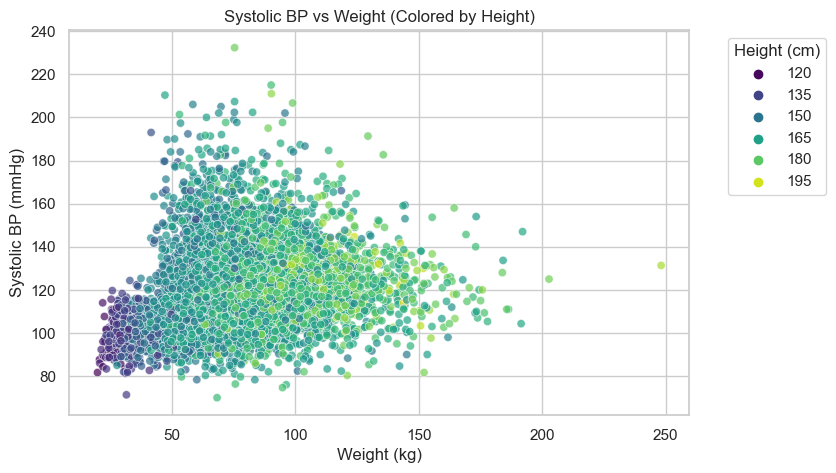

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Weight_kg',
    y='Systolic_BP',
    hue='Height_cm',
    data=df2,
    palette='viridis',
    alpha=0.7
)
plt.title("Systolic BP vs Weight (Colored by Height)")
plt.xlabel("Weight (kg)")
plt.ylabel("Systolic BP (mmHg)")
plt.legend(title="Height (cm)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
